In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('../input/ge-stock/ge.us.txt')

trainset = df.iloc[:,1:2]

scaler = MinMaxScaler(feature_range = (0,1))
trainset_scaled = scaler.fit_transform(trainset)

X_train=[]
Y_train=[]
for i in range(60,13057):
    X_train.append(trainset_scaled[i-60:i, 0])
    Y_train.append(trainset_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)


Epoch 1/100
407/407 [==============================] - 6s 14ms/step - loss: 0.0023
Epoch 2/100
407/407 [==============================] - 6s 14ms/step - loss: 0.0012
Epoch 3/100
407/407 [==============================] - 6s 14ms/step - loss: 9.5788e-04
Epoch 4/100
407/407 [==============================] - 6s 14ms/step - loss: 8.1851e-04
Epoch 5/100
407/407 [==============================] - 6s 14ms/step - loss: 7.8826e-04
Epoch 6/100
407/407 [==============================] - 6s 14ms/step - loss: 7.7153e-04
Epoch 7/100
407/407 [==============================] - 6s 14ms/step - loss: 6.7671e-04
Epoch 8/100
407/407 [==============================] - 6s 14ms/step - loss: 7.3090e-04
Epoch 9/100
407/407 [==============================] - 6s 14ms/step - loss: 6.8948e-04
Epoch 10/100
407/407 [==============================] - 6s 16ms/step - loss: 6.5944e-04
Epoch 11/100
407/407 [==============================] - 6s 14ms/step - loss: 6.3497e-04
Epoch 12/100
407/407 [===========================

,Open
0,24.386
1,24.248
2,24.327
3,24.277
4,24.188
5,24.149
6,24.287
7,24.089
8,24.248
9,24.169


<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7f63fc317c10>>

[[[0.57823716]
  [0.56724163]
  [0.56039058]
  ...
  [0.51810011]
  [0.51619704]
  [0.51516092]]

 [[0.56724163]
  [0.56039058]
  [0.55728223]
  ...
  [0.51619704]
  [0.51516092]
  [0.5059416 ]]

 [[0.56039058]
  [0.55728223]
  [0.55768399]
  ...
  [0.51516092]
  [0.5059416 ]
  [0.50302356]]

 ...

 [[0.51810011]
  [0.51619704]
  [0.51516092]
  ...
  [0.41150698]
  [0.42419412]
  [0.41679329]]

 [[0.51619704]
  [0.51516092]
  [0.5059416 ]
  ...
  [0.42419412]
  [0.41679329]
  [0.4176391 ]]

 [[0.51516092]
  [0.5059416 ]
  [0.50302356]
  ...
  [0.41679329]
  [0.4176391 ]
  [0.41404441]]]


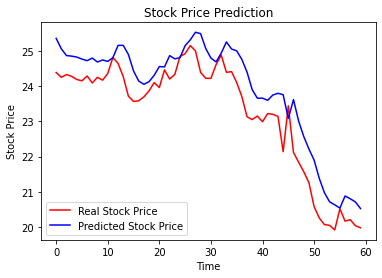

In [2]:
real_price = df.iloc[13998:, 1:2]
for row in real_price.index:
    real_price = real_price.rename(index = {row:row-13998})
dataset_total = df['Open']
inputs = dataset_total[13998-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.asarray(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
plt.plot(real_price, color = 'Green', label = 'Real Stock Price')
plt.plot(predicted_price, color = 'Orange', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()